# Lecture 8 - Data Cleaning

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('display.precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [50]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# Wonhee's special methods to display large DataFrames
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Tidy Data

Based off Hadley Wickham's _R for Data Science_ book: https://r4ds.had.co.nz/tidy-data.html

In [52]:
# Tuberculosis data obtained from World Health Organization (WHO) website
tb = pd.read_csv('tb.csv')
tb

,country,iso2,iso3,year,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,...,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,...,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,ZW,ZWE,2011,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,...,3526.00,1453.00,811.00,725.00


In [53]:
tb.columns

Index(['country', 'iso2', 'iso3', 'year', 'newrel_m014', 'newrel_m1524',
       'newrel_m2534', 'newrel_m3544', 'newrel_m4554', 'newrel_m5564',
       'newrel_m65', 'newrel_f014', 'newrel_f1524', 'newrel_f2534',
       'newrel_f3544', 'newrel_f4554', 'newrel_f5564', 'newrel_f65'],
      dtype='object')

Look for data dictionary and what each column means (brief data description below):

- newrel = new cases or relapse cases
- m = male;  f = female
- number corresponding to age range, e.g., 3544 indicating 35-44 years old

Acting as a data scientist, I will show how to make this data tidy. 
I want to take all newrel_xxxx columns and make their own rows in my new table 
every row in my table correspond to an observation for a countury in a given year for a given sex of a person and for a given age range.
I want to split off all of these different newrel_xxxx columns and make them and turn it into a single column in my table. 

In [54]:
tb

,country,iso2,iso3,year,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,...,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,...,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,ZW,ZWE,2011,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,...,3526.00,1453.00,811.00,725.00


In [55]:
# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections
df_interact(tb)

interactive(children=(IntSlider(value=0, description='row', max=7240, step=7), IntSlider(value=0, description=…

(7240 rows, 18 columns) total


In [56]:
display_df(tb)

,country,iso2,iso3,year,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,...,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,...,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,ZW,ZWE,2011,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,...,3526.00,1453.00,811.00,725.00


#### # drop iso2 iso3 duplicated columns using .drop() method

In [57]:
# write the code

tb.drop(columns=['iso2', 'iso3'])

,country,year,newrel_m014,newrel_m1524,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,...,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,...,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,2011,NaN,NaN,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,2012,NaN,NaN,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,2013,1315.00,1642.00,...,3526.00,1453.00,811.00,725.00


### Introduce pipe in pandas

Instead of writing my commands line by line,
I will create a function for every operation I want to do. 

In [58]:
def drop_iso(df):
    return df.drop(columns=['iso2', 'iso3'])

#### # drop iso2 iso3 duplicated columns using .pipe() method and drop_iso() function

In [59]:
# write the code

tb.pipe(drop_iso)

,country,year,newrel_m014,newrel_m1524,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,...,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,...,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,2011,NaN,NaN,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,2012,NaN,NaN,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,2013,1315.00,1642.00,...,3526.00,1453.00,811.00,725.00


### Introduce melt in pandas

In [60]:
tb

,country,iso2,iso3,year,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,...,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,...,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,ZW,ZWE,2011,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,...,3526.00,1453.00,811.00,725.00


#### # define the function that operating .melt() method with 'country' and 'year' as identifier variables

In [61]:
def make_tidy(df):
    return pd.melt(df, id_vars=['country', 'year'])

In [62]:
tb.pipe(make_tidy)

,country,year,variable,value
0,Afghanistan,1980,iso2,AF
1,Afghanistan,1981,iso2,AF
2,Afghanistan,1982,iso2,AF
...,...,...,...,...
115837,Zimbabwe,2011,newrel_f65,NaN
115838,Zimbabwe,2012,newrel_f65,NaN
115839,Zimbabwe,2013,newrel_f65,725.00


In [63]:
tb

,country,iso2,iso3,year,...,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,...,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,...,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7237,Zimbabwe,ZW,ZWE,2011,...,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,...,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,...,3526.00,1453.00,811.00,725.00


In [64]:
(tb.pipe(drop_iso).
 pipe(make_tidy))

,country,year,variable,value
0,Afghanistan,1980,newrel_m014,NaN
1,Afghanistan,1981,newrel_m014,NaN
2,Afghanistan,1982,newrel_m014,NaN
...,...,...,...,...
101357,Zimbabwe,2011,newrel_f65,NaN
101358,Zimbabwe,2012,newrel_f65,NaN
101359,Zimbabwe,2013,newrel_f65,725.00


#### # define the function that operating .melt() method with 'country' and 'year' as identifier variables, 'entry' as variable name, and 'count' as value name.

In [65]:
def make_tidy(df):
    return pd.melt(df, id_vars=['country', 'year'], var_name='entry', value_name='count')

In [66]:
(tb.pipe(drop_iso).
 pipe(make_tidy))

,country,year,entry,count
0,Afghanistan,1980,newrel_m014,NaN
1,Afghanistan,1981,newrel_m014,NaN
2,Afghanistan,1982,newrel_m014,NaN
...,...,...,...,...
101357,Zimbabwe,2011,newrel_f65,NaN
101358,Zimbabwe,2012,newrel_f65,NaN
101359,Zimbabwe,2013,newrel_f65,725.00


### Introduce split in pandas

In [67]:
def split_entry(df):
    codes = df['entry'].str.split('_').str[-1]
    return (df.assign(sex=codes.str[0], agecode=codes.str[1:])
            .drop(columns=['entry']))

In [68]:
(tb.pipe(drop_iso)
 .pipe(make_tidy)
 .pipe(split_entry))

,country,year,count,sex,agecode
0,Afghanistan,1980,NaN,m,014
1,Afghanistan,1981,NaN,m,014
2,Afghanistan,1982,NaN,m,014
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65
101358,Zimbabwe,2012,NaN,f,65
101359,Zimbabwe,2013,725.00,f,65


In [69]:
def age_from_code(df):
    return df.assign(age=df['agecode'].replace({
        '014': '0-14',
        '04': '0-4',
        '1524': '15-24',
        '2534': '25-34',
        '3544': '35-44',
        '4554': '45-54',
        '5564': '55-64',
        '65': '65+',
    })).drop(columns='agecode')

#### # make 'tidy' dataframe with .pipe(), drop_iso, make_tidy, split_entry, age_from_code

In [70]:
tidy = tb.pipe(drop_iso).pipe(make_tidy).pipe(split_entry).pipe(age_from_code)
tidy

,country,year,count,sex,age
0,Afghanistan,1980,NaN,m,0-14
1,Afghanistan,1981,NaN,m,0-14
2,Afghanistan,1982,NaN,m,0-14
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65+
101358,Zimbabwe,2012,NaN,f,65+
101359,Zimbabwe,2013,725.00,f,65+


#### # fill in the blank(#####) to make a result below

In [71]:
counts = (tidy
 .groupby(['country', 'year'])
 .mean(numeric_only=True)
 .dropna()
 .reset_index()
 .loc[lambda df: df['country'].str[0] == 'R']
)
counts

,country,year,count
140,Republic of Korea,2013,2969.50
141,Republic of Moldova,2013,320.36
142,Romania,2013,1108.79
143,Russian Federation,2013,6459.07
144,Rwanda,2013,407.29


Tidy data is especially useful for seaborn, the plotting library we will use extensively in this course!

<Axes: xlabel='count', ylabel='country'>

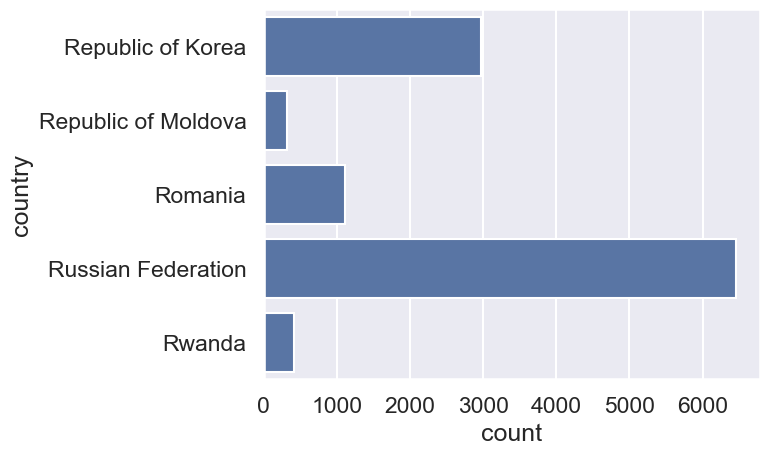

In [72]:
sns.barplot(x='count', y='country', data=counts)

## JSON

In [73]:
elections = pd.read_csv("elections.csv")
elections.to_json("elections.json") # orient='table' or 'records' or 'values'
!python -m json.tool elections.json 

{
    "Candidate": {
        "0": "Reagan",
        "1": "Carter",
        "2": "Anderson",
        "3": "Reagan",
        "4": "Mondale",
        "5": "Bush",
        "6": "Dukakis",
        "7": "Clinton",
        "8": "Bush",
        "9": "Perot",
        "10": "Clinton",
        "11": "Dole",
        "12": "Perot",
        "13": "Gore",
        "14": "Bush",
        "15": "Kerry",
        "16": "Bush",
        "17": "Obama",
        "18": "McCain",
        "19": "Obama",
        "20": "Romney",
        "21": "Clinton",
        "22": "Trump"
    },
    "Party": {
        "0": "Republican",
        "1": "Democratic",
        "2": "Independent",
        "3": "Republican",
        "4": "Democratic",
        "5": "Republican",
        "6": "Democratic",
        "7": "Democratic",
        "8": "Republican",
        "9": "Independent",
        "10": "Democratic",
        "11": "Republican",
        "12": "Independent",
        "13": "Democratic",
        "14": "Republican",
        "15": 

## Hierarchical Data

A lot of structured data isn't in CSV format, but in HTML, XML, JSON, YAML, etc. JSON might have a structure that Pandas can't read directly.

Here's an example: a group of people collected information about US congressional legislators in YAML format.

https://github.com/unitedstates/congress-legislators

Here's one of the data files:

https://github.com/unitedstates/congress-legislators/blob/master/legislators-current.yaml

In [83]:
%pip install pyyaml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
# download data
import requests
from pathlib import Path

legislators_path = 'legislators-current.yaml'
base_url = 'https://github.com/unitedstates/congress-legislators/raw/dc6fde4ed65f88edf11568d0522eca17b439f447/'

def download(url, path):
    """Download the contents of a URL to a local file."""
    path = Path(path) # If path was a string, now it's a Path
    if not path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(url)
        with path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        
download(base_url + legislators_path, legislators_path)

In [85]:
import yaml

legislators = yaml.safe_load(open(legislators_path, 'rt', encoding='UTF8'))
len(legislators)

539

In [86]:
legislators

[{'id': {'bioguide': 'B000944',
   'thomas': '00136',
   'lis': 'S307',
   'govtrack': 400050,
   'opensecrets': 'N00003535',
   'votesmart': 27018,
   'fec': ['H2OH13033', 'S6OH00163'],
   'cspan': 5051,
   'wikipedia': 'Sherrod Brown',
   'house_history': 9996,
   'ballotpedia': 'Sherrod Brown',
   'maplight': 168,
   'icpsr': 29389,
   'wikidata': 'Q381880',
   'google_entity_id': 'kg:/m/034s80'},
  'name': {'first': 'Sherrod',
   'last': 'Brown',
   'official_full': 'Sherrod Brown'},
  'bio': {'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'},
  'terms': [{'type': 'rep',
    'start': '1993-01-05',
    'end': '1995-01-03',
    'state': 'OH',
    'district': 13,
    'party': 'Democrat'},
   {'type': 'rep',
    'start': '1995-01-04',
    'end': '1997-01-03',
    'state': 'OH',
    'district': 13,
    'party': 'Democrat'},
   {'type': 'rep',
    'start': '1997-01-07',
    'end': '1999-01-03',
    'state': 'OH',
    'district': 13,
    'party': 'Democrat'},
   {'type': 'r

In [77]:
# Python dictionary, not yaml dictionary
legislators[0]

{'id': {'bioguide': 'B000944',
  'thomas': '00136',
  'lis': 'S307',
  'govtrack': 400050,
  'opensecrets': 'N00003535',
  'votesmart': 27018,
  'fec': ['H2OH13033', 'S6OH00163'],
  'cspan': 5051,
  'wikipedia': 'Sherrod Brown',
  'house_history': 9996,
  'ballotpedia': 'Sherrod Brown',
  'maplight': 168,
  'icpsr': 29389,
  'wikidata': 'Q381880',
  'google_entity_id': 'kg:/m/034s80'},
 'name': {'first': 'Sherrod',
  'last': 'Brown',
  'official_full': 'Sherrod Brown'},
 'bio': {'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'},
 'terms': [{'type': 'rep',
   'start': '1993-01-05',
   'end': '1995-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1995-01-04',
   'end': '1997-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1997-01-07',
   'end': '1999-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1999-01-06',
   'end

In [78]:
x = legislators[0]
x['id']

{'bioguide': 'B000944',
 'thomas': '00136',
 'lis': 'S307',
 'govtrack': 400050,
 'opensecrets': 'N00003535',
 'votesmart': 27018,
 'fec': ['H2OH13033', 'S6OH00163'],
 'cspan': 5051,
 'wikipedia': 'Sherrod Brown',
 'house_history': 9996,
 'ballotpedia': 'Sherrod Brown',
 'maplight': 168,
 'icpsr': 29389,
 'wikidata': 'Q381880',
 'google_entity_id': 'kg:/m/034s80'}

In [79]:
x['name']

{'first': 'Sherrod', 'last': 'Brown', 'official_full': 'Sherrod Brown'}

In [80]:
x['bio']

{'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'}

### How old a person is

In [81]:
from datetime import datetime

def to_date(s):
    return datetime.strptime(s, '%Y-%m-%d')

to_date(x['bio']['birthday'])

datetime.datetime(1952, 11, 9, 0, 0)

#### # fill in the blank to make a result below

In [87]:
leg_df = pd.DataFrame(
    columns=['id', 'first', 'last', 'birthday'],
    data=[[x['id']['bioguide'], 
           x['name']['first'],
           x['name']['last'],
           to_date(x['bio']['birthday'])] for x in legislators])
leg_df.head()

,id,first,last,birthday
0,B000944,Sherrod,Brown,1952-11-09
1,C000127,Maria,Cantwell,1958-10-13
2,C000141,Benjamin,Cardin,1943-10-05
3,C000174,Thomas,Carper,1947-01-23
4,C001070,Robert,Casey,1960-04-13


In [88]:
datetime.now() - leg_df.loc[0, 'birthday']

Timedelta('26623 days 13:32:22.769504')

#### # fill in the blank to make a result below

In [89]:
leg_df['age'] = (datetime.now() - leg_df['birthday']).apply(lambda age: age.days/365)
leg_df.head()

,id,first,last,birthday,age
0,B000944,Sherrod,Brown,1952-11-09,72.94
1,C000127,Maria,Cantwell,1958-10-13,67.01
2,C000141,Benjamin,Cardin,1943-10-05,82.04
3,C000174,Thomas,Carper,1947-01-23,78.74
4,C001070,Robert,Casey,1960-04-13,65.51


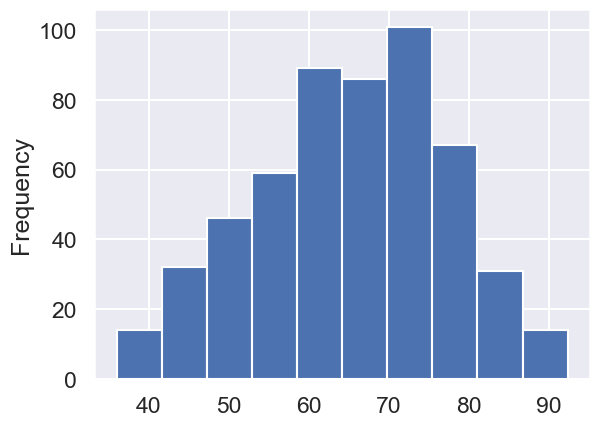

In [90]:
leg_df['age'].plot(kind='hist');

## Missing Values

In [91]:
legislators[0]

{'id': {'bioguide': 'B000944',
  'thomas': '00136',
  'lis': 'S307',
  'govtrack': 400050,
  'opensecrets': 'N00003535',
  'votesmart': 27018,
  'fec': ['H2OH13033', 'S6OH00163'],
  'cspan': 5051,
  'wikipedia': 'Sherrod Brown',
  'house_history': 9996,
  'ballotpedia': 'Sherrod Brown',
  'maplight': 168,
  'icpsr': 29389,
  'wikidata': 'Q381880',
  'google_entity_id': 'kg:/m/034s80'},
 'name': {'first': 'Sherrod',
  'last': 'Brown',
  'official_full': 'Sherrod Brown'},
 'bio': {'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'},
 'terms': [{'type': 'rep',
   'start': '1993-01-05',
   'end': '1995-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1995-01-04',
   'end': '1997-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1997-01-07',
   'end': '1999-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1999-01-06',
   'end

In [92]:
legislators[0]['bio']['religion']

'Lutheran'

In [93]:
# Let's try to add religion column
leg_df

,id,first,last,birthday,age
0,B000944,Sherrod,Brown,1952-11-09,72.94
1,C000127,Maria,Cantwell,1958-10-13,67.01
2,C000141,Benjamin,Cardin,1943-10-05,82.04
...,...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12,78.61
537,M001197,Martha,McSally,1966-03-22,59.57
538,G000592,Jared,Golden,1982-07-25,43.21


In [94]:
leg_df['religion'] = [x['bio']['religion'] for x in legislators]

KeyError: 'religion'

In [95]:
leg_df['religion'] = [x['bio'].get('religion') for x in legislators]
leg_df

,id,first,last,birthday,age,religion
0,B000944,Sherrod,Brown,1952-11-09,72.94,Lutheran
1,C000127,Maria,Cantwell,1958-10-13,67.01,Roman Catholic
2,C000141,Benjamin,Cardin,1943-10-05,82.04,Jewish
...,...,...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12,78.61,None
537,M001197,Martha,McSally,1966-03-22,59.57,None
538,G000592,Jared,Golden,1982-07-25,43.21,None


This is because some people do not have a religion recorded and thus try to use 'get' method for dictionary

In [96]:
# I will drop people without religion for our data set
leg_df['religion'].notnull()

0       True
1       True
2       True
       ...  
536    False
537    False
538    False
Name: religion, Length: 539, dtype: bool

In [97]:
leg_df[leg_df['religion'].notnull()]

,id,first,last,birthday,age,religion
0,B000944,Sherrod,Brown,1952-11-09,72.94,Lutheran
1,C000127,Maria,Cantwell,1958-10-13,67.01,Roman Catholic
2,C000141,Benjamin,Cardin,1943-10-05,82.04,Jewish
...,...,...,...,...,...,...
253,W000779,Ron,Wyden,1949-05-03,76.46,Jewish
255,Y000033,Don,Young,1933-06-09,92.37,Episcopalian
445,C001055,Ed,Case,1952-09-27,73.06,Protestant


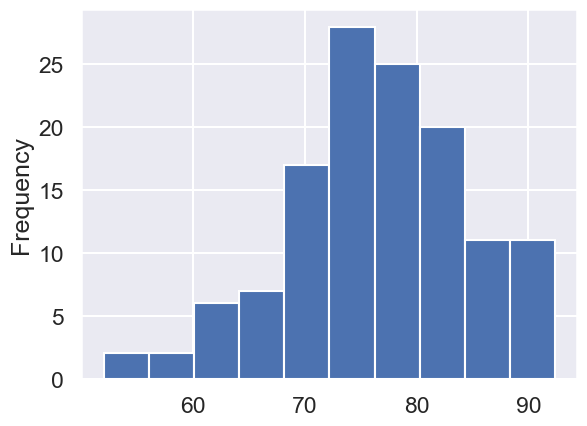

In [98]:
leg_df[leg_df['religion'].notnull()]['age'].plot(kind='hist');

## Joins

In [99]:
comm_path = 'committees-current.yaml'
comm_membership_path = 'committee-membership-current.yaml'
for p in [comm_path, comm_membership_path]:
    download(base_url + p, p)
comms = yaml.safe_load(open(comm_path, 'rt', encoding='UTF8'))
comm_membership = yaml.safe_load(open(comm_membership_path, 'rt', encoding='UTF8'))
print(len(comms), len(comm_membership))

47 217


In [100]:
comms[0]

{'type': 'house',
 'name': 'House Committee on Agriculture',
 'url': 'https://agriculture.house.gov/',
 'minority_url': 'https://democrats-agriculture.house.gov/',
 'thomas_id': 'HSAG',
 'house_committee_id': 'AG',
 'subcommittees': [{'name': 'Conservation and Forestry',
   'thomas_id': '15',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Commodity Exchanges, Energy, and Credit',
   'thomas_id': '22',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'General Farm Commodities and Risk Management',
   'thomas_id': '16',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Livestock and Foreign Agriculture',
   'thomas_id': '29',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Biotechnology, Horticulture, and Research',
   'thomas_id': '14',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
 

In [101]:
comm_membership

{'HLIG': [{'name': 'Devin Nunes',
   'party': 'majority',
   'rank': 1,
   'title': 'Chair',
   'thomas': '01710',
   'bioguide': 'N000181'},
  {'name': 'K. Michael Conaway',
   'party': 'majority',
   'rank': 2,
   'thomas': '01805',
   'bioguide': 'C001062'},
  {'name': 'Peter T. King',
   'party': 'majority',
   'rank': 3,
   'thomas': '00635',
   'bioguide': 'K000210'},
  {'name': 'Michael R. Turner',
   'party': 'majority',
   'rank': 7,
   'thomas': '01741',
   'bioguide': 'T000463'},
  {'name': 'Brad R. Wenstrup',
   'party': 'majority',
   'rank': 8,
   'thomas': '02152',
   'bioguide': 'W000815'},
  {'name': 'Chris Stewart',
   'party': 'majority',
   'rank': 9,
   'thomas': '02168',
   'bioguide': 'S001192'},
  {'name': 'Eric A. "Rick" Crawford',
   'party': 'majority',
   'rank': 10,
   'thomas': '01989',
   'bioguide': 'C001087'},
  {'name': 'Elise M. Stefanik',
   'party': 'majority',
   'rank': 12,
   'thomas': '02263',
   'bioguide': 'S001196'},
  {'name': 'Will Hurd',
 

We wil make a dataframe out of these committees

#### # fill in the blank to make a result below

In [103]:
comm_df = pd.DataFrame(
    columns=['name', 'thomas_id', 'type'],
    data=[[c['name'], c['thomas_id'], c['type']] for c in comms]
)
comm_df

,name,thomas_id,type
0,House Committee on Agriculture,HSAG,house
1,House Committee on Appropriations,HSAP,house
2,House Committee on Armed Services,HSAS,house
...,...,...,...
44,Senate Committee on Rules and Administration,SSRA,senate
45,Senate Committee on Small Business and Entrepr...,SSSB,senate
46,Senate Committee on Veterans' Affairs,SSVA,senate


In [104]:
member_df = pd.DataFrame(
    columns=['comm_id', 'leg_id'],
    data=[[c, m['bioguide']] for c, members in comm_membership.items() for m in members]
)
member_df.head()

,comm_id,leg_id
0,HLIG,N000181
1,HLIG,C001062
2,HLIG,K000210
3,HLIG,T000463
4,HLIG,W000815


In [105]:
# Let's merge method in pandas
member_comm = member_df.merge(comm_df, left_on='comm_id', right_on='thomas_id')
member_comm.head()
# primary key (thomas_id) of comm_df table is 
# foreign key (comm_id) of member_df table
# member_df = left dataframe
# comm_df = right dataframe

,comm_id,leg_id,name,thomas_id,type
0,HLIG,N000181,House Permanent Select Committee on Intelligence,HLIG,house
1,HLIG,C001062,House Permanent Select Committee on Intelligence,HLIG,house
2,HLIG,K000210,House Permanent Select Committee on Intelligence,HLIG,house
3,HLIG,T000463,House Permanent Select Committee on Intelligence,HLIG,house
4,HLIG,W000815,House Permanent Select Committee on Intelligence,HLIG,house


In [106]:
comm_sizes = member_comm['name'].value_counts()
comm_sizes

name
House Committee on Armed Services                                 48
House Committee on Energy and Commerce                            48
House Committee on Transportation and Infrastructure              47
                                                                  ..
Joint Committee on Printing                                        6
Joint Committee on Taxation                                        5
United States Senate Caucus on International Narcotics Control     5
Name: count, Length: 47, dtype: int64

In [107]:
leg_df

,id,first,last,birthday,age,religion
0,B000944,Sherrod,Brown,1952-11-09,72.94,Lutheran
1,C000127,Maria,Cantwell,1958-10-13,67.01,Roman Catholic
2,C000141,Benjamin,Cardin,1943-10-05,82.04,Jewish
...,...,...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12,78.61,None
537,M001197,Martha,McSally,1966-03-22,59.57,None
538,G000592,Jared,Golden,1982-07-25,43.21,None


#### # merge 'member_comm' and 'leg_df' with 'leg_id' and 'id' as column names to join on.

In [108]:
df = member_comm.merge(leg_df, left_on='leg_id', right_on='id')
df

,comm_id,leg_id,name,thomas_id,...,last,birthday,age,religion
0,HLIG,N000181,House Permanent Select Committee on Intelligence,HLIG,...,Nunes,1973-10-01,52.03,Roman Catholic
1,HLIG,C001062,House Permanent Select Committee on Intelligence,HLIG,...,Conaway,1948-06-11,77.36,Baptist
2,HLIG,K000210,House Permanent Select Committee on Intelligence,HLIG,...,King,1944-04-05,81.54,Roman Catholic
...,...,...,...,...,...,...,...,...,...
1061,SSVA,B001277,Senate Committee on Veterans' Affairs,SSVA,...,Blumenthal,1946-02-13,79.68,None
1062,SSVA,H001042,Senate Committee on Veterans' Affairs,SSVA,...,Hirono,1947-11-03,77.96,None
1063,SSVA,M001183,Senate Committee on Veterans' Affairs,SSVA,...,Manchin,1947-08-24,78.16,None


In [109]:
df

,comm_id,leg_id,name,thomas_id,...,last,birthday,age,religion
0,HLIG,N000181,House Permanent Select Committee on Intelligence,HLIG,...,Nunes,1973-10-01,52.03,Roman Catholic
1,HLIG,C001062,House Permanent Select Committee on Intelligence,HLIG,...,Conaway,1948-06-11,77.36,Baptist
2,HLIG,K000210,House Permanent Select Committee on Intelligence,HLIG,...,King,1944-04-05,81.54,Roman Catholic
...,...,...,...,...,...,...,...,...,...
1061,SSVA,B001277,Senate Committee on Veterans' Affairs,SSVA,...,Blumenthal,1946-02-13,79.68,None
1062,SSVA,H001042,Senate Committee on Veterans' Affairs,SSVA,...,Hirono,1947-11-03,77.96,None
1063,SSVA,M001183,Senate Committee on Veterans' Affairs,SSVA,...,Manchin,1947-08-24,78.16,None


#### # create a Dataframe by sorting the average age of members by Committee in ascending order.

In [110]:
comm_ages = df['age'].groupby(df['name']).mean().sort_values()
comm_ages

name
House Permanent Select Committee on Intelligence                 61.47
House Committee on House Administration                          61.58
Joint Economic Committee                                         61.83
                                                                  ... 
Joint Committee on Taxation                                      77.79
Joint Committee on the Library                                   80.29
United States Senate Caucus on International Narcotics Control   82.12
Name: age, Length: 47, dtype: float64